<a href="https://colab.research.google.com/github/NikitaMelnychencko/goit-algo-hw-06/blob/main/Modul6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# --- Аналіз та прогнозування ціни нерухомості ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Housing.csv to Housing.csv


In [ ]:
df = pd.read_csv("Housing.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [ ]:
# print("=== АНАЛІЗ ДАТАСЕТУ НЕРУХОМОСТІ ===")
print(f"Розмір датасету: {df.shape}")
print(f"Цільова змінна (price): {df['price'].describe()}")
print("\nПерші 5 рядків:")
print(df[['price', 'area', 'bedrooms', 'bathrooms', 'stories']].head())

Розмір датасету: (545, 19)
Цільова змінна (price): count    5.450000e+02
mean     4.766729e+06
std      1.870440e+06
min      1.750000e+06
25%      3.430000e+06
50%      4.340000e+06
75%      5.740000e+06
max      1.330000e+07
Name: price, dtype: float64

Перші 5 рядків:
      price  area  bedrooms  bathrooms  stories
0  13300000  7420         4          2        3
1  12250000  8960         4          4        4
2  12250000  9960         3          2        2
3  12215000  7500         4          2        2
4  11410000  7420         4          1        2


In [ ]:
feature_columns = ['area', 'bedrooms', 'bathrooms', 'stories']

X = df[feature_columns].values
y = df['price'].values


# Нормалізація даних
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()
print(f"\nПідготовлені ознаки: {X_scaled.shape}")
print(f"Цільова змінна: {y_scaled.shape}")


Підготовлені ознаки: (545, 4)
Цільова змінна: (545,)


In [ ]:
# # --- Градієнтний спуск ---
def mse(y_true, y_pred):
    """Середня квадратична помилка"""
    return np.mean((y_true - y_pred) ** 2)

In [ ]:

def grad_descent(X, y, iter=1000, lr=0.01, stopping_threshold=1e-6):
    """
    Градієнтний спуск для множинної лінійної регресії
    """
    n_samples, n_features = X.shape

    print(n_samples)
    print(n_features)

    # Ініціалізація ваг
    weights = np.random.randn(n_features) * 0.01
    bias = 0
    prev_cost = None

    costs = []

    for i in range(iter):
        # Передбачення
        y_pred = X.dot(weights) + bias

        # Обчислення вартості
        cost = mse(y, y_pred)
        costs.append(cost)

        # Перевірка зупинки
        if prev_cost and abs(cost - prev_cost) <= stopping_threshold:
            print(f"Збіжність досягнута на ітерації {i+1}")
            break

        prev_cost = cost

        # Обчислення градієнтів
        error = y - y_pred
        weights_grad = -(2/n_samples) * X.T.dot(error)
        bias_grad = -(2/n_samples) * np.sum(error)

        # Оновлення параметрів
        weights -= lr * weights_grad
        bias -= lr * bias_grad

        if (i + 1) % 100 == 0:
            print(f"Iteration {i+1}: Cost={cost:.6f}")

    return weights, bias, costs




In [ ]:
print("\n=== ГРАДІЄНТНИЙ СПУСК ===")
weights_gd, bias_gd, costs = grad_descent(X_scaled, y_scaled, iter=2000, lr=0.01)


=== ГРАДІЄНТНИЙ СПУСК ===
Iteration 100: Cost=0.468352
Iteration 200: Cost=0.464606
Збіжність досягнута на ітерації 264


In [ ]:
# Передбачення на тренувальних даних
y_pred_gd = X_scaled.dot(weights_gd) + bias_gd
y_pred_gd

array([ 1.36829788e+00,  3.23612109e+00,  1.48693427e+00,  1.10415613e+00,
        4.50009526e-01,  1.34685883e+00,  2.52127826e+00,  3.61723822e+00,
        5.87587618e-01,  1.19581882e+00,  1.50449246e+00,  1.43863600e+00,
        9.11951445e-01,  2.94873240e-01,  1.04992150e+00,  1.62714099e-01,
        9.22067482e-01,  1.75220081e+00,  4.02495189e-01,  7.70718905e-01,
       -2.92115562e-01,  6.39097236e-01,  1.82213335e-01,  3.94402360e-01,
        1.25224223e+00,  9.09928238e-01,  1.24639900e+00,  3.49127931e-01,
        1.31013130e+00,  6.99514686e-01,  1.54482207e+00,  8.10758778e-01,
        5.74075838e-01,  1.31561232e+00,  4.47594353e-01,  1.44871973e+00,
        1.26591091e+00,  1.96829202e+00,  6.08438055e-01,  1.36132985e+00,
        1.59059651e-01,  1.31923446e+00,  1.34351295e+00,  1.36132985e+00,
        1.36132985e+00,  9.66071603e-01,  1.24639900e+00,  7.29830489e-01,
        3.41798972e-01,  6.96758642e-01,  1.53774084e+00,  6.74192290e-01,
        1.36132985e+00,  

In [ ]:

print(f"\nРезультати градієнтного спуску:")
print(f"Фінальна вартість: {costs[-1]:.6f}")
print(f"Ваги: {weights_gd}")
print(f"Зміщення: {bias_gd}")




Результати градієнтного спуску:
Фінальна вартість: 0.464443
Ваги: [0.4386615  0.08474845 0.32026177 0.2429587 ]
Зміщення: 3.08727559317417e-16


In [ ]:
# --- Порівняння з scikit-learn ---
print("\n=== SCIKIT-LEARN LINEAR REGRESSION ===")
lr_model = LinearRegression()
lr_model.fit(X_scaled, y_scaled)
y_pred_lr = lr_model.predict(X_scaled)

print(f"Ваги (scikit-learn): {lr_model.coef_}")
print(f"Зміщення (scikit-learn): {lr_model.intercept_}")


=== SCIKIT-LEARN LINEAR REGRESSION ===
Ваги (scikit-learn): [0.44091592 0.07824617 0.32241309 0.24654881]
Зміщення (scikit-learn): 3.324134261716656e-16



=== ПОРІВНЯННЯ РЕЗУЛЬТАТІВ ===
Градієнтний спуск - MSE: 0.464443, R²: 0.535557
Scikit-learn - MSE: 0.464404, R²: 0.535596


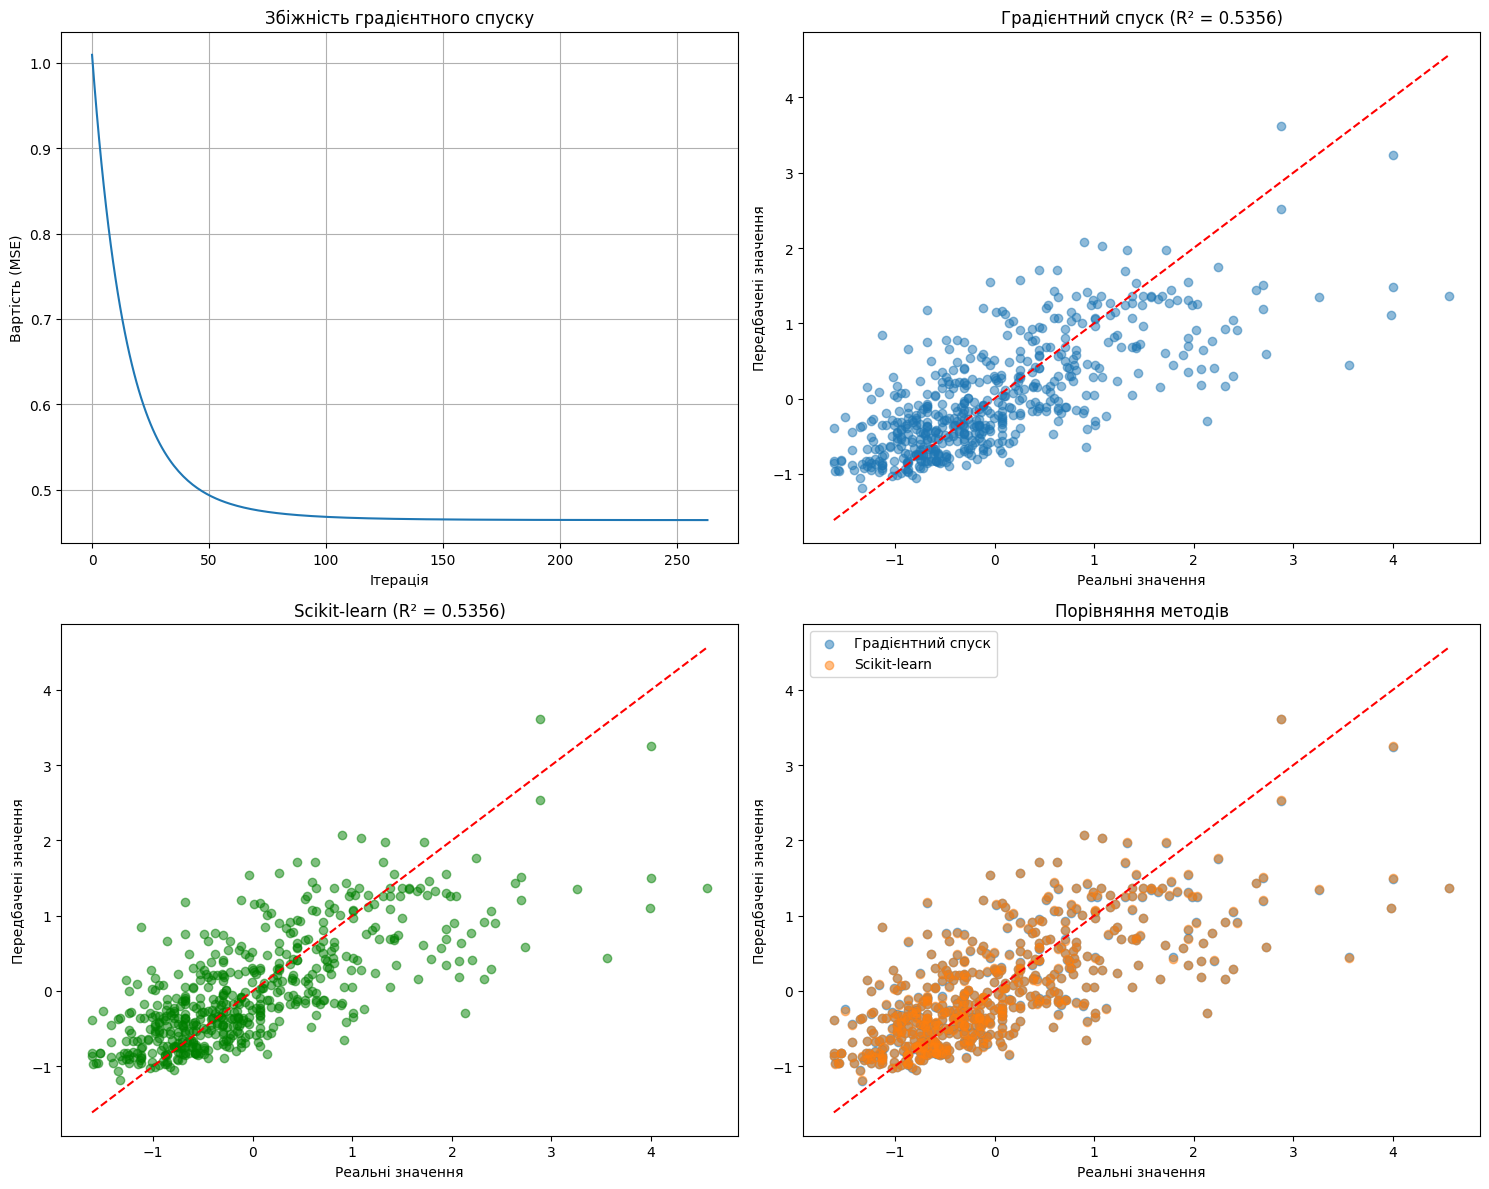


=== ВАЖЛИВІСТЬ ОЗНАК ===
     Feature  Gradient_Descent  Scikit_Learn
0       area          0.438662      0.440916
2  bathrooms          0.320262      0.322413
3    stories          0.242959      0.246549
1   bedrooms          0.084748      0.078246


In [ ]:

# --- Порівняння результатів ---
mse_gd = mean_squared_error(y_scaled, y_pred_gd)
mse_lr = mean_squared_error(y_scaled, y_pred_lr)
r2_gd = r2_score(y_scaled, y_pred_gd)
r2_lr = r2_score(y_scaled, y_pred_lr)

print(f"\n=== ПОРІВНЯННЯ РЕЗУЛЬТАТІВ ===")
print(f"Градієнтний спуск - MSE: {mse_gd:.6f}, R²: {r2_gd:.6f}")
print(f"Scikit-learn - MSE: {mse_lr:.6f}, R²: {r2_lr:.6f}")

# --- Візуалізація ---
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Графік збіжності
axes[0, 0].plot(costs)
axes[0, 0].set_title('Збіжність градієнтного спуску')
axes[0, 0].set_xlabel('Ітерація')
axes[0, 0].set_ylabel('Вартість (MSE)')
axes[0, 0].grid(True)

# 2. Порівняння передбачень - градієнтний спуск
axes[0, 1].scatter(y_scaled, y_pred_gd, alpha=0.5)
axes[0, 1].plot([y_scaled.min(), y_scaled.max()], [y_scaled.min(), y_scaled.max()], 'r--')
axes[0, 1].set_title(f'Градієнтний спуск (R² = {r2_gd:.4f})')
axes[0, 1].set_xlabel('Реальні значення')
axes[0, 1].set_ylabel('Передбачені значення')

# 3. Порівняння передбачень - scikit-learn
axes[1, 0].scatter(y_scaled, y_pred_lr, alpha=0.5, color='green')
axes[1, 0].plot([y_scaled.min(), y_scaled.max()], [y_scaled.min(), y_scaled.max()], 'r--')
axes[1, 0].set_title(f'Scikit-learn (R² = {r2_lr:.4f})')
axes[1, 0].set_xlabel('Реальні значення')
axes[1, 0].set_ylabel('Передбачені значення')

# 4. Порівняння двох методів
axes[1, 1].scatter(y_scaled, y_pred_gd, alpha=0.5, label='Градієнтний спуск')
axes[1, 1].scatter(y_scaled, y_pred_lr, alpha=0.5, label='Scikit-learn')
axes[1, 1].plot([y_scaled.min(), y_scaled.max()], [y_scaled.min(), y_scaled.max()], 'r--')
axes[1, 1].set_title('Порівняння методів')
axes[1, 1].set_xlabel('Реальні значення')
axes[1, 1].set_ylabel('Передбачені значення')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

# --- Аналіз важливості ознак ---
print("\n=== ВАЖЛИВІСТЬ ОЗНАК ===")
feature_importance = pd.DataFrame({
    'Feature': feature_columns,
    'Gradient_Descent': np.abs(weights_gd),
    'Scikit_Learn': np.abs(lr_model.coef_)
})

feature_importance = feature_importance.sort_values('Gradient_Descent', ascending=False)
print(feature_importance)
